In [73]:
import numpy as np

In [74]:
train_x = []
train_y = []
with open('./测试数据/数据分类/朴素贝叶斯/train.txt') as f_train:
    for line in f_train.readlines():
        train_x_y_tmp = line.split('\t')[-1]
#         print(train_x_y_tmp)
        train_y_tmp, train_x_tmp = train_x_y_tmp.split(':')
        train_x_tmp = train_x_tmp.strip().split(',')
#         print(train_x_tmp)
        train_x.append(train_x_tmp)
        train_y.append(train_y_tmp)
        
train_x = np.array(train_x, dtype='float32')
train_y = np.array(train_y, dtype='int')
print(train_x)
print(train_y)
        

[[ 92. 115. 120. ... 107. 113.  87.]
 [ 84. 102. 106. ...  99. 104.  79.]
 [ 84. 102. 102. ...  99. 104.  79.]
 ...
 [ 68.  75. 108. ... 100. 104.  85.]
 [ 71.  87. 108. ...  91. 104.  85.]
 [ 71.  91. 100. ...  91. 100.  81.]]
[3 3 3 ... 4 4 4]


In [75]:
print(train_x.shape)

(4435, 36)


In [76]:
from sklearn.manifold import Isomap

In [77]:
iso = Isomap(n_components=2)

In [78]:
iso.fit(train_x)
data_projected = iso.transform(train_x)

In [79]:
data_projected.shape

(4435, 2)

In [80]:
import matplotlib.pyplot as plt

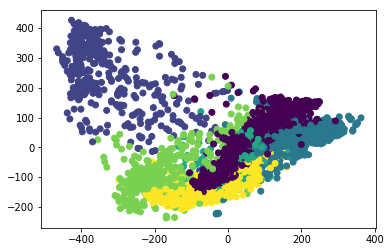

In [81]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = train_y)

In [82]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(train_x, train_y, random_state=0)


In [83]:
from sklearn.naive_bayes import GaussianNB

In [84]:
GNB = GaussianNB()
GNB.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
y_predict = GNB.predict(Xtest)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(ytest, y_predict)

0.7971145175834085

In [94]:
import scikitplot as skplt

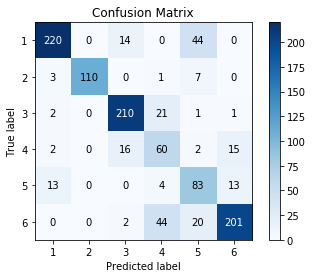

In [98]:
skplt.metrics.plot_confusion_matrix(ytest, y_predict)

In [50]:
83/(44+7+1+2+83+20)

0.5286624203821656

In [65]:
# 支持向量机
from sklearn.svm import SVC

In [69]:
clf = SVC(kernel='rbf', C=1E10).fit(Xtrain, ytrain)

C:\Users\lilanqing\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [70]:
y_predict = clf.predict(Xtest)
accuracy_score(ytest, y_predict)

0.25969341749323716

In [71]:
Xtrain.shape

(3326, 36)